# Flux de patients selon les GHM et diagrammes de Sankey

In [1]:
!pip install prefixspan

In [2]:
from prefixspan import PrefixSpan
import pandas as pd
import numpy as np
from tqdm import tqdm

## Import des parcours de soins

In [3]:
p_soins_IC=pd.read_csv("./data/p_soins_IC_morts.csv", index_col=0)

In [4]:
p_soins_IC=p_soins_IC.rename(columns={"0": "CODE_PATIENT", "1": "cluster"})

In [5]:
def truncateGHM(df):
    for i in tqdm(range(2, df.shape[1])):
        df[str(i)]=df[str(i)].map(lambda x: str(x)[:5])
    df = df.replace('nan', np.nan)

In [6]:
truncateGHM(p_soins_IC)
p_soins_IC=p_soins_IC.replace('nan', np.nan)

100%|██████████| 75/75 [00:00<00:00, 935.56it/s]


In [7]:
p_soins_IC.head()

,CODE_PATIENT,cluster,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,P6,4,05M09,04M13,05C22,23M10,04M05,04M24,Décès,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P17,5,05M09,04M14,11M04,04M05,09M06,05K25,09M06,09M06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P24,1,05M09,05M17,05M13,05M13,05M13,05K06,05M13,05M13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P30,1,05M09,03M04,23M20,05M08,05K06,19M06,23M20,05M09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P38,4,05M09,23M15,23Z02,08M25,23Z02,23Z02,Décès,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Flux de GHM pour l'ensemble de la population avec IC

In [8]:
p_soins_IC_12=p_soins_IC.iloc[:,2:4]
p_soins_IC_12.head()

,2,3
0,05M09,04M13
1,05M09,04M14
2,05M09,05M17
3,05M09,03M04
4,05M09,23M15


In [39]:
corpus_IC=[]
for patient in range(len(p_soins_IC_12)):
    corpus_IC.append([p_soins_IC_12.iloc[patient][0], p_soins_IC_12.iloc[patient][1]])

In [40]:
ps = PrefixSpan(corpus_IC)
ps.minlen=2
output1=ps.topk(k=20)

In [41]:
for i in output1:
    ghm1=str(i[1][0])
    ghm2=str(i[1][1])
    print("['"+ghm1+'\'',",\'"+ghm2+" ',",round(i[0]/len(corpus_IC),3),"],")

['05M09' ,'Décès ', 0.225 ],
['05M09' ,'05M09 ', 0.178 ],
['05M09' ,'05K10 ', 0.026 ],
['05M09' ,'04M05 ', 0.024 ],
['05M09' ,'05M08 ', 0.02 ],
['05M09' ,'04M13 ', 0.019 ],
['05M09' ,'23M20 ', 0.015 ],
['05M09' ,'16M11 ', 0.015 ],
['05M09' ,'04M20 ', 0.014 ],
['05M09' ,'05K06 ', 0.011 ],
['05M09' ,'11M06 ', 0.011 ],
['05M09' ,'23Z02 ', 0.01 ],
['05M09' ,'01M30 ', 0.01 ],
['05M09' ,'02C05 ', 0.01 ],
['05M09' ,'08C49 ', 0.01 ],
['05M09' ,'19M06 ', 0.01 ],
['05M09' ,'10M16 ', 0.008 ],
['05M09' ,'04M03 ', 0.008 ],
['05M09' ,'11M04 ', 0.008 ],
['05M09' ,'06M04 ', 0.008 ],


In [42]:
p_soins_IC_23=p_soins_IC.iloc[:,3:5]
p_soins_IC_23.head()

,3,4
0,04M13,05C22
1,04M14,11M04
2,05M17,05M13
3,03M04,23M20
4,23M15,23Z02


In [43]:
corpus_IC_2=[]
for patient in range(len(p_soins_IC_23)):
    if str(p_soins_IC_23.iloc[patient][1])!='nan':
        corpus_IC_2.append([p_soins_IC_23.iloc[patient][0], p_soins_IC_23.iloc[patient][1]])
    else:
        corpus_IC_2.append([p_soins_IC_23.iloc[patient][0], 'nan'])

In [44]:
ps = PrefixSpan(corpus_IC_2)
ps.minlen=2
output2=ps.topk(k=20)

In [45]:
for i in output2:
    ghm1=str(i[1][0])
    ghm2=str(i[1][1])
    print("['"+ghm1+' \'',",\' "+ghm2+" ',",round(i[0]/len(corpus_IC),3),"],")

['Décès ' ,' nan ', 0.225 ],
['05M09 ' ,' 05M09 ', 0.053 ],
['05M09 ' ,' Décès ', 0.038 ],
['23Z02 ' ,' Décès ', 0.008 ],
['04M05 ' ,' Décès ', 0.006 ],
['04M13 ' ,' Décès ', 0.005 ],
['05K10 ' ,' 05M09 ', 0.005 ],
['01M30 ' ,' Décès ', 0.005 ],
['05M22 ' ,' Décès ', 0.005 ],
['04M24 ' ,' Décès ', 0.005 ],
['04M05 ' ,' 05M09 ', 0.004 ],
['05M09 ' ,' 04M13 ', 0.004 ],
['04M07 ' ,' Décès ', 0.003 ],
['08C49 ' ,' Décès ', 0.003 ],
['05M09 ' ,' 04M05 ', 0.003 ],
['05M09 ' ,' 05M08 ', 0.003 ],
['05M08 ' ,' 05M09 ', 0.003 ],
['05M09 ' ,' 01M30 ', 0.003 ],
['06M09 ' ,' Décès ', 0.003 ],
['10M16 ' ,' Décès ', 0.003 ],


In [46]:
p_soins_IC_34=p_soins_IC.iloc[:,4:6]
p_soins_IC_34.head()

,4,5
0,05C22,23M10
1,11M04,04M05
2,05M13,05M13
3,23M20,05M08
4,23Z02,08M25


In [47]:
corpus_IC_3=[]
for patient in range(len(p_soins_IC_34)):
    if str(p_soins_IC_34.iloc[patient][1])!='nan':
        corpus_IC_3.append([p_soins_IC_34.iloc[patient][0], p_soins_IC_34.iloc[patient][1]])
    else:
        corpus_IC_3.append([p_soins_IC_34.iloc[patient][0], 'nan'])

In [48]:
ps = PrefixSpan(corpus_IC_3)
ps.minlen=2
output3=ps.topk(k=20)

In [49]:
for i in output3:
    ghm1=str(i[1][0])
    ghm2=str(i[1][1])
    print("[' "+ghm1+' \'',",\' "+ghm2+"  ',",round(i[0]/len(corpus_IC),3),"],")

[' nan ' ,' nan  ', 0.225 ],
[' Décès ' ,' nan  ', 0.159 ],
[' 05M09 ' ,' 05M09  ', 0.038 ],
[' 05M09 ' ,' Décès  ', 0.028 ],
[' 23Z02 ' ,' Décès  ', 0.008 ],
[' 01M30 ' ,' Décès  ', 0.005 ],
[' 04M05 ' ,' Décès  ', 0.005 ],
[' 04M13 ' ,' Décès  ', 0.004 ],
[' 08C49 ' ,' Décès  ', 0.004 ],
[' 04M24 ' ,' Décès  ', 0.004 ],
[' 05M22 ' ,' Décès  ', 0.004 ],
[' 04M05 ' ,' 04M05  ', 0.004 ],
[' 05M09 ' ,' 04M05  ', 0.003 ],
[' 05M09 ' ,' 05K10  ', 0.003 ],
[' 04M05 ' ,' 05M09  ', 0.003 ],
[' 05M09 ' ,' 11M04  ', 0.003 ],
[' 11M06 ' ,' Décès  ', 0.003 ],
[' 16M11 ' ,' Décès  ', 0.003 ],
[' 16M11 ' ,' 16M11  ', 0.002 ],
[' 23M20 ' ,' 05M09  ', 0.002 ],


## Test Sankey Python Plotly

In [50]:
labels=[]
for corpus in [corpus_IC, corpus_IC_2, corpus_IC_3]:
    labels.append(pd.Series(corpus_IC).explode().drop_duplicates().reset_index(drop=True).to_list())
    
labels=pd.Series(labels).explode().reset_index(drop=True).to_list()
labels.append('nan')

In [51]:
labels_multilevel=labels.copy()
for GHM in labels:
    labels_multilevel.append(GHM+' ')
    labels_multilevel.append(' '+GHM)
    labels_multilevel.append(' '+GHM+' ')
    labels_multilevel.append(' '+GHM+'  ')
labels_multilevel.append('nan')
labels_multilevel.append(' nan')
labels_multilevel.append('nan ')
labels_multilevel.append(' nan ')
labels_multilevel.append('nan  ')

In [54]:
source = []
target = []
value = []

for elt in output1:
    value.append(elt[0])
    source.append(labels_multilevel.index(elt[1][0]))
    target.append(labels_multilevel.index(elt[1][1]+' '))
    
for elt in output2:
    value.append(elt[0])
    source.append(labels_multilevel.index(' '+elt[1][0]))
    target.append(labels_multilevel.index(' '+elt[1][1]+' '))
    
for elt in output3:
    value.append(elt[0])
    source.append(labels_multilevel.index(' '+elt[1][0]+' '))
    target.append(labels_multilevel.index(' '+elt[1][1]+'  '))

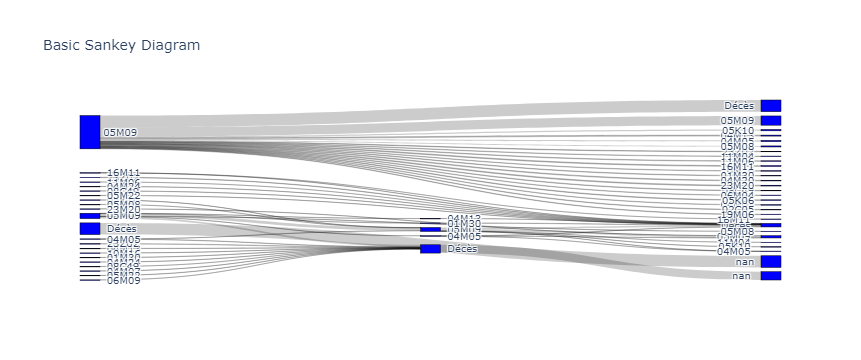

In [56]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels_multilevel,
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

## Flux de patients par clusters

In [57]:
def generate3stepsSankey(cluster_n, k):
    p_soins_IC_12_cluster_n=p_soins_IC[p_soins_IC["cluster"]==cluster_n].astype(str).iloc[:,2:4]
    p_soins_IC_23_cluster_n=p_soins_IC[p_soins_IC["cluster"]==cluster_n].astype(str).iloc[:,3:5]
    nb_patients_cluster_n=len(p_soins_IC_12_cluster_n)
    
    corpus_IC=[]
    for patient in range(nb_patients_cluster_n):
        corpus_IC.append([p_soins_IC_12_cluster_n.iloc[patient][0], p_soins_IC_12_cluster_n.iloc[patient][1]])

    ps = PrefixSpan(corpus_IC)
    ps.minlen=2
    output=ps.topk(k)

    for i in output:
        ghm1=str(i[1][0])
        ghm2=str(i[1][1])
        print("['"+ghm1+'\'',",\'"+ghm2+" ',",i[0],",",round(i[0]/nb_patients_cluster_n,3),"],")

    print("\n")

    corpus_IC_2=[]
    for patient in range(nb_patients_cluster_n):
        if str(p_soins_IC_23_cluster_n.iloc[patient][1])!='nan':
            corpus_IC_2.append([p_soins_IC_23_cluster_n.iloc[patient][0], p_soins_IC_23_cluster_n.iloc[patient][1]])
        else:
            corpus_IC_2.append([p_soins_IC_23_cluster_n.iloc[patient][0], 'nan'])

    ps = PrefixSpan(corpus_IC_2)
    ps.minlen=2
    output=ps.topk(k)

    for i in output:
        ghm1=str(i[1][0])
        ghm2=str(i[1][1])
        print("['"+ghm1+' \'',",\' "+ghm2+" ',",i[0],",",round(i[0]/nb_patients_cluster_n,3),"],")

In [62]:
generate3stepsSankey(5, 20)

['05M09' ,'05M09 ', 28 , 0.217 ],
['05M09' ,'23M20 ', 7 , 0.054 ],
['05M09' ,'Décès ', 6 , 0.047 ],
['05M09' ,'05K06 ', 5 , 0.039 ],
['05M09' ,'05K10 ', 5 , 0.039 ],
['05M09' ,'05M12 ', 4 , 0.031 ],
['05M09' ,'05M20 ', 4 , 0.031 ],
['05M09' ,'04M05 ', 2 , 0.016 ],
['05M09' ,'04M13 ', 2 , 0.016 ],
['05M09' ,'04M14 ', 2 , 0.016 ],
['05M09' ,'06M04 ', 2 , 0.016 ],
['05M09' ,'08M35 ', 2 , 0.016 ],
['05M09' ,'09M05 ', 2 , 0.016 ],
['05M09' ,'11M06 ', 2 , 0.016 ],
['05M09' ,'11M19 ', 2 , 0.016 ],
['05M09' ,'23K02 ', 2 , 0.016 ],
['05M09' ,'23M06 ', 2 , 0.016 ],
['05M09' ,'23M10 ', 2 , 0.016 ],
['05M09' ,'11C02 ', 1 , 0.008 ],
['05M09' ,'19M06 ', 1 , 0.008 ],


['05M09 ' ,' 05M09 ', 9 , 0.07 ],
['Décès ' ,' nan ', 6 , 0.047 ],
['05M09 ' ,' Décès ', 4 , 0.031 ],
['05M09 ' ,' 04M20 ', 2 , 0.016 ],
['05M09 ' ,' 05M08 ', 2 , 0.016 ],
['05M09 ' ,' 16M11 ', 2 , 0.016 ],
['23M20 ' ,' 05M17 ', 2 , 0.016 ],
['05M09 ' ,' 01M20 ', 1 , 0.008 ],
['05M09 ' ,' 01M30 ', 1 , 0.008 ],
['05M09 ' ,' 05C19 ', 1 ,

In [19]:
for cluster_n in range(1,6):
    print(len(p_soins_IC[p_soins_IC["cluster"]==cluster_n]))

507
1542
9
1111
129
